# **SME0828 - Introdução à Ciência de Dados**

**PRIMEIRO PROJETO**

GRUPO:

11366868 - Diane Damaris Dorst (dorst@usp.br),

10329238 - Guilherme Castro Dallasta ( dallasta_guilherme@usp.br ),

11371291 - Matheus de Tulio ( matheus_ma14@usp.br ). 



#READ ME!
Para que o código rode apropriadamente, deve-se fazer o upload dos dados na pasta sample_data da plataforma, que está na imagem da pasta a esquerda da tela. Basta abri-la, entrar em sample_data e clicar nos 3 pontos à direita dessa e fazer o upload dos dados.
Os dados mativeram-se com os nomes vindos do .zip data, sendo: iris.csv, iris-with-errors.csv e BostonHousing.csv.
Toda nova sessão, os arquivos armazenados são limpos, sendo necessário que o procedimento acima seja refeito.

##Exercícios de fixação
1 - Leia os dados com erro novamente, faça a limpeza e remova as duas últimas colunas.

2 - Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

3 - Conside os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

4 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

5 - Monte um boxplot para cada variável dos dados da Iris.

6 - Encontre os outliers nos dados das bases Iris e BostonHouse.

##Imports

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
import seaborn as sns
from scipy import stats

##Tópico 1

###Leitura dos dados com erro

In [ ]:
data = pd.read_csv('sample_data/iris-with-errors.csv', header=(0)) #leitura do arquivo com erro

In [ ]:
print("Número de linhas e colunas:",data.shape) #dataframe do arquivo com erros
data.head(25)

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


###Limpeza dos dados com erros

In [ ]:
data = data.replace('?', np.nan) # Substitui um caracter desejado por Nan
data = data.dropna() # remove as linhas com NaN
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa


In [ ]:
data.duplicated() # Retorna True na posição em que há uma linha duplicada

0     False
1      True
3     False
4      True
6     False
7     False
8      True
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
22    False
dtype: bool

In [ ]:
data = data.drop_duplicates() #retirando linhas duplicadas
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


###Remoção das duas últimas colunas

In [ ]:
print("Atributos atuais:",data.columns) #colunas atuais
data = data.drop(data.columns[[-1, -2]], axis=1) #retirando duas últimas colunas
print("Atributos atualizadas:",data.columns) #colunas atualizadas

Atributos atuais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Atributos atualizadas: Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')


##Tópico 2

###Releitura dos dados com erro

In [ ]:
data = pd.read_csv('sample_data/iris-with-errors.csv', header=(0))
print(data.shape)
data.head(25)

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


###Substituição de cada atributo Nan pelo valor da mediana

É preferível usar o valor da mediana, pois esta não é afetada por valores discrepantes(outliers).

In [ ]:
data = data.replace('?', np.nan)
data_m = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float) #transfromando em array, retirando a última coluna
median = np.nanmedian(data_m, axis = 0) #cálculo da mediana
for i in np.arange(0, data_m.shape[0]):
    for j in np.arange(0, data_m.shape[1]):
        if(np.isnan(data_m[i,j]) == True): # verificar se é uma entrada com Nan
            data_m[i,j] = median[j] # insere a mediana
print(data_m)

[[5.1  3.5  1.4  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.2 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.4  2.9  1.4  0.2 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.2 ]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.45 1.7  0.3 ]
 [5.05 3.8  1.5  0.3 ]]


In [ ]:
#transformação de um array para um dataframe
data_fm = pd.DataFrame(data_m, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
aux = pd.DataFrame(data_fm) 
aux = aux.assign(species = data.species) #acrescentando coluna
pd.DataFrame(aux)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.4,0.2,duplicada
1,5.10,3.50,1.4,0.2,duplicada
2,5.05,3.00,1.4,0.2,setosa
3,4.70,3.20,1.3,0.2,setosa
4,5.10,3.50,1.4,0.2,duplicada
5,5.05,3.10,1.5,0.2,setosa
6,5.00,3.60,1.4,0.2,setosa
7,5.40,3.90,1.7,0.4,duplicada
8,5.40,3.90,1.7,0.4,duplicada
9,4.60,3.40,1.4,0.2,setosa


##Tópico 3

In [ ]:
data = pd.read_csv('sample_data/iris.csv', header=(0)) #leitura dos dados iris.csv(total sem erro)

###Normalização e padronização dos dados

In [ ]:
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))

scaler = MinMaxScaler(feature_range=(0, 1)) # prepara a função para transformar os dados
X_norm = scaler.fit_transform(X) # Realiza a normalização e coloca em um novo vetor

Maior valor da coluna: 0 : 7.9
Menor Valor da coluna: 0 : 4.3
Maior valor da coluna: 1 : 4.4
Menor Valor da coluna: 1 : 2.0
Maior valor da coluna: 2 : 6.9
Menor Valor da coluna: 2 : 1.0
Maior valor da coluna: 3 : 2.5
Menor Valor da coluna: 3 : 0.1


In [ ]:
X_norm = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = StandardScaler().fit(X_norm) # prepara a função para transformar os dados
rescaledX = scaler.transform(X_norm) # realiza a padronização (média=0, variância = 1)
print(rescaledX)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
data = data.rename(columns = { 'class':'species'}) #substituindo nome _class por species

In [ ]:
#transformação de um array em DataFrame
data_norm_padr = pd.DataFrame(rescaledX, columns=['sepal_length_new', 'sepal_width_new', 'petal_length_new', 'petal_width_new'])
data_norm_padr = data_norm_padr.assign(species = data.species) #acrescentando coluna

In [ ]:
data_norm_padr # DataFrame com os valores normalizados e padronizados.

,sepal_length_new,sepal_width_new,petal_length_new,petal_width_new,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,virginica
146,0.553333,-1.281972,0.705893,0.922064,virginica
147,0.795669,-0.124958,0.819624,1.053537,virginica
148,0.432165,0.800654,0.933356,1.447956,virginica


###Distribuição do tamanho das sépalas

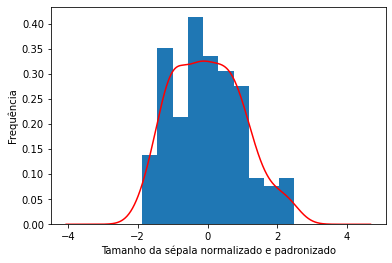

In [ ]:
#histograma com os valores normalizados do tamanho das sépalas sem diferenciação de espécies
data_norm_padr['sepal_length_new'].plot.kde(color = 'red')
data_norm_padr['sepal_length_new'].plot.hist(density = True)
plt.xlabel('Tamanho da sépala normalizado e padronizado')
plt.ylabel('Frequência')

plt.show()

####Gráfico de frequência do tamanho das sépalas

In [ ]:
data_setosa = data_norm_padr[0:50] #separação de cada espécie por intervalo
data_setosa_sl = data_setosa.iloc[:,0] #seleção da primeira coluna(tamanho da sépala)
data_versicolor = data_norm_padr[51:100]
data_versicolor_sl = data_versicolor.iloc[:,0]
data_virginica = data_norm_padr[101:150]
data_virginica_sl = data_virginica.iloc[:,0]

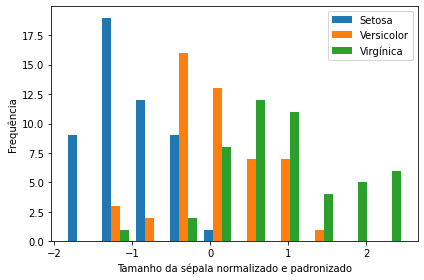

In [ ]:
#histograma com os valores normalizados do tamanho das sépalas com diferenciação de espécies
fig, ax1 = plt.subplots()
ax1.hist([data_setosa_sl,data_versicolor_sl,data_virginica_sl],  label=['Setosa', 'Versicolor', 'Virgínica'])
ax1.set_ylabel("Frequência")
plt.legend(loc='upper right')
ax1.set_xlabel("Tamanho da sépala normalizado e padronizado")
plt.tight_layout()
plt.show()

Com a diferenciação de espécies é possível intepretar os picos contidos no histograma sem a diferenciação. Auxiliando na observação dos dados.

###Distribuição da largura das sépalas

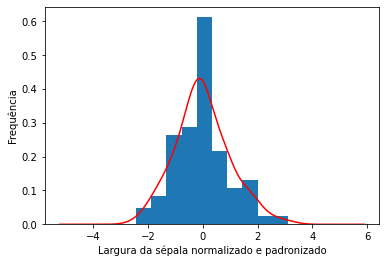

In [ ]:
data_norm_padr['sepal_width_new'].plot.kde(color = 'red')
data_norm_padr['sepal_width_new'].plot.hist(density = True)
plt.xlabel('Largura da sépala normalizado e padronizado')
plt.ylabel('Frequência')
plt.show()

####Gráfico de frequência da largura das sépalas

In [ ]:
data_setosa_sw = data_setosa.iloc[:,1] #seleção da segunda coluna(largura da sépala)
data_versicolor_sw = data_versicolor.iloc[:,1]
data_virginica_sw = data_virginica.iloc[:,1]

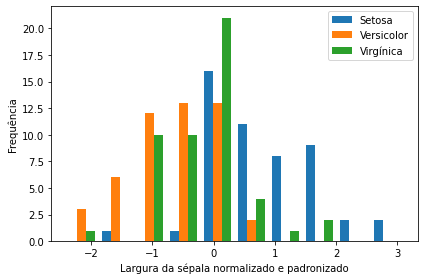

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([data_setosa_sw,data_versicolor_sw,data_virginica_sw],  label=['Setosa', 'Versicolor', 'Virgínica'])
ax1.set_ylabel("Frequência")
plt.legend(loc='upper right')
ax1.set_xlabel("Largura da sépala normalizado e padronizado")
plt.tight_layout()
plt.show()

###Distribuição do tamanho das pétalas

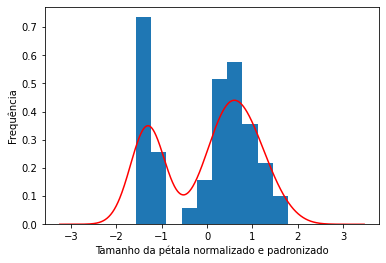

In [ ]:
data_norm_padr['petal_length_new'].plot.kde(color = 'red')
data_norm_padr['petal_length_new'].plot.hist(density = True)
plt.xlabel('Tamanho da pétala normalizado e padronizado')
plt.ylabel('Frequência')
plt.show()

####Gráfico de frequência do tamanho das pétalas

In [ ]:
data_setosa_pl = data_setosa.iloc[:,2] #seleção da terceira coluna(tamanho da sépala)
data_versicolor_pl = data_versicolor.iloc[:,2]
data_virginica_pl = data_virginica.iloc[:,2]

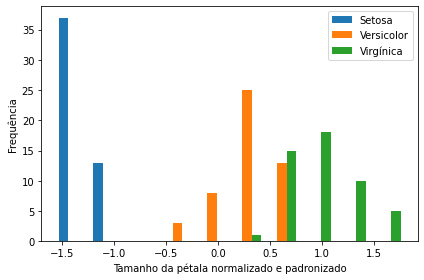

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([data_setosa_pl,data_versicolor_pl,data_virginica_pl],  label=['Setosa', 'Versicolor', 'Virgínica'])
ax1.set_ylabel("Frequência")
plt.legend(loc='upper right')
ax1.set_xlabel("Tamanho da pétala normalizado e padronizado")
plt.tight_layout()
plt.show()

O histograma com diferenciação de espécies permite apontar que o primeiro pico no histograma sem diferenciação de espécies deve-se às setosas, e o segundo à junção das outras duas espécies.

###Distibruição da largura das pétalas

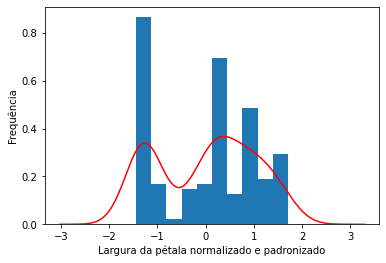

In [ ]:
data_norm_padr['petal_width_new'].plot.kde(color = 'red')
data_norm_padr['petal_width_new'].plot.hist(density = True)
plt.xlabel('Largura da pétala normalizado e padronizado')
plt.ylabel('Frequência')
plt.show()

####Gráfico de frequência da largura das pétalas

In [ ]:
data_setosa_pw = data_setosa.iloc[:,3] #seleção da quarta coluna(largura da pétala)
data_versicolor_pw = data_versicolor.iloc[:,3]
data_virginica_pw = data_virginica.iloc[:,3]

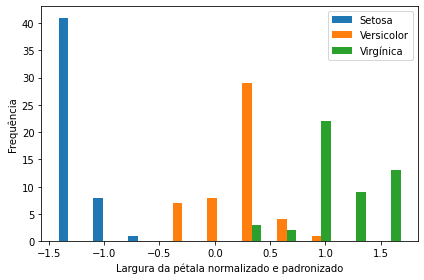

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([data_setosa_pw,data_versicolor_pw,data_virginica_pw],  label=['Setosa', 'Versicolor', 'Virgínica'])
ax1.set_ylabel("Frequência")
plt.legend(loc='upper right')
ax1.set_xlabel("Largura da pétala normalizado e padronizado")
plt.tight_layout()
plt.show()

##Tópico 4

###Reamostragem dos dados da Iris

#### Seleção de 10 elementos aleatórios em cada classe

In [ ]:
data_setosa = data_setosa.sample(10,axis =0) #seleção aleatória de 10 elementos no eixo x
data_versicolor = data_versicolor.sample(10, axis= 0)
data_virginica = data_virginica.sample(10, axis= 0)

#Concatenando os DataFrames acima
data_reagrupado = pd.concat([data_setosa,data_versicolor,data_virginica], axis = 0)
data_reagrupado

,sepal_length_new,sepal_width_new,petal_length_new,petal_width_new,species
8,-1.748856,-0.356361,-1.341272,-1.312977,setosa
16,-0.537178,1.957669,-1.398138,-1.050031,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
15,-0.173674,3.114684,-1.284407,-1.050031,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
36,-0.416010,1.032057,-1.398138,-1.312977,setosa
38,-1.748856,-0.124958,-1.398138,-1.312977,setosa
35,-1.021849,0.337848,-1.455004,-1.312977,setosa
28,-0.779513,0.800654,-1.341272,-1.312977,setosa


##Tópico 5

###Costrução de boxplot para cada variável dos dados da Iris.

In [ ]:
data = pd.read_csv('sample_data/iris.csv', header=(0))

In [ ]:
data.columns #para construção dos boxplot das variáveis

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data = pd.read_csv('sample_data/iris.csv', header=(0))

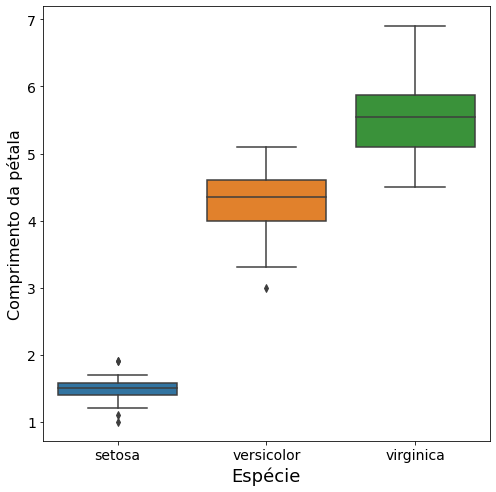

In [ ]:
#boxplot por espécie do comprimento da pétala
plt.figure(figsize=(8, 8))
sns.boxplot(x="species", y="petal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

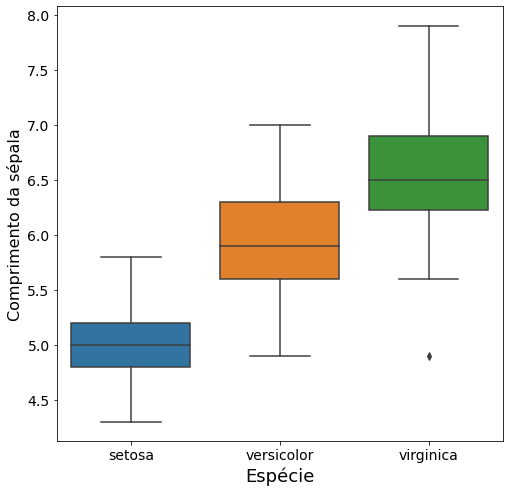

In [ ]:
#boxplot por espécie do comprimento da sépala
data = pd.read_csv('sample_data/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
sns.boxplot(x="species", y="sepal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

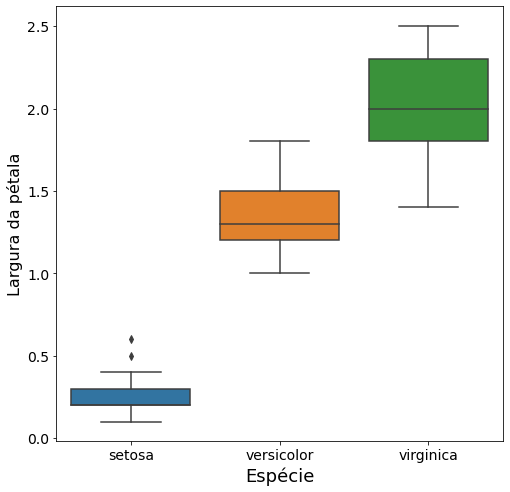

In [ ]:
#boxplot por espécie da largura da pétala
data = pd.read_csv('sample_data/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
sns.boxplot(x="species", y="petal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

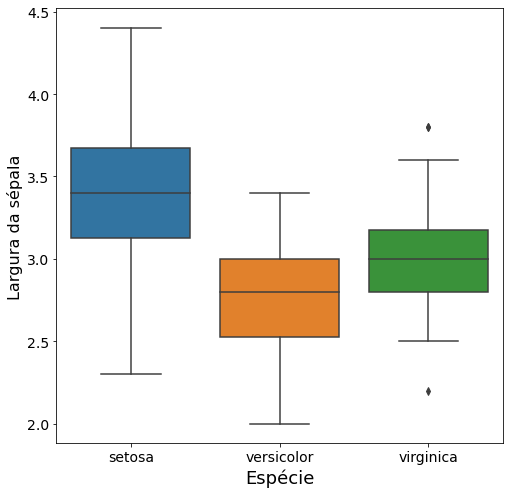

In [ ]:
#boxplot por espécie da largura da sépala
data = pd.read_csv('sample_data/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
sns.boxplot(x="species", y="sepal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

##Tópico 6

###Dados: Iris

In [ ]:
data = pd.read_csv('sample_data/iris.csv', header=(0))

####Outliers das setosas

A separação por espécie permite melhor visualização de outliers

In [ ]:
data_setosa = data[0:50] 
#definição de quantis e intervalo para que não seja um outlier
Q1 = data_setosa.quantile(0.25)
Q3 = data_setosa.quantile(0.75)
IQR = Q3 - Q1

print(((data_setosa < (Q1 - 1.5 * IQR)) | (data_setosa > (Q3 + 1.5 * IQR))))

    petal_length  petal_width  sepal_length  sepal_width  species
0          False        False         False        False    False
1          False        False         False        False    False
2          False        False         False        False    False
3          False        False         False        False    False
4          False        False         False        False    False
5          False        False         False        False    False
6          False        False         False        False    False
7          False        False         False        False    False
8          False        False         False        False    False
9          False        False         False        False    False
10         False        False         False        False    False
11         False        False         False        False    False
12         False        False         False        False    False
13          True        False         False        False    False
14        

####Outliers das versicolors

In [ ]:
data_versicolor= data[51:100]
#definição de quantis e intervalo para que não seja um outlier
Q1 = data_versicolor.quantile(0.25)
Q3 = data_versicolor.quantile(0.75)
IQR = Q3 - Q1

print(((data_versicolor< (Q1 - 1.5 * IQR)) | (data_versicolor > (Q3 + 1.5 * IQR))))


    petal_length  petal_width  sepal_length  sepal_width  species
51         False        False         False        False    False
52         False        False         False        False    False
53         False        False         False        False    False
54         False        False         False        False    False
55         False        False         False        False    False
56         False        False         False        False    False
57         False        False         False        False    False
58         False        False         False        False    False
59         False        False         False        False    False
60         False        False         False        False    False
61         False        False         False        False    False
62         False        False         False        False    False
63         False        False         False        False    False
64         False        False         False        False    False
65        

####Outliers das virgínicas

In [ ]:
data_virginica = data[101:150]
#definição de quantis e intervalo para que não seja um outlier
Q1 = data_virginica.quantile(0.25) 
Q3 = data_virginica.quantile(0.75)
IQR = Q3 - Q1

print(((data_virginica < (Q1 - 1.5 * IQR)) | (data_virginica > (Q3 + 1.5 * IQR))))

     petal_length  petal_width  sepal_length  sepal_width  species
101         False        False         False        False    False
102         False        False         False        False    False
103         False        False         False        False    False
104         False        False         False        False    False
105         False        False         False        False    False
106         False        False          True        False    False
107         False        False         False        False    False
108         False        False         False        False    False
109         False        False         False         True    False
110         False        False         False        False    False
111         False        False         False        False    False
112         False        False         False        False    False
113         False        False         False        False    False
114         False        False         False        False    F

###Dados: BostonHousing

####Outliers contidos em cada variável dos dados Boston Housing

In [ ]:
data_boston = pd.read_csv('sample_data/BostonHousing.csv', header=(0))

In [ ]:
data_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#definição de quantis e intervalo para que não seja um outlier
Q1 = data_boston.quantile(0.25)
Q3 = data_boston.quantile(0.75)
IQR = Q3 - Q1

data_boston_out = ((data_boston < (Q1 - 1.5 * IQR)) | (data_boston > (Q3 + 1.5 * IQR)))
data_boston_out

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


####Boxplot para cada variável dos dados Boston Housing

#####Boxplots com dados não normalizados e não padronizados

In [ ]:
data_boston.columns #visualização das variáveis contidas nos dados

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

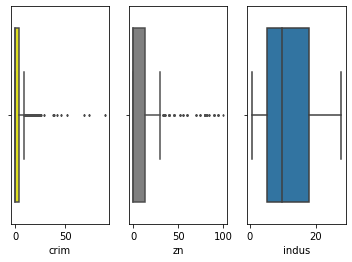

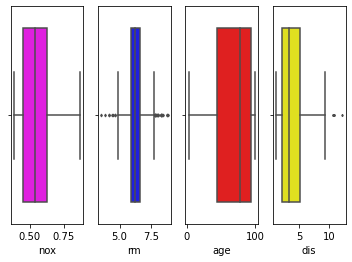

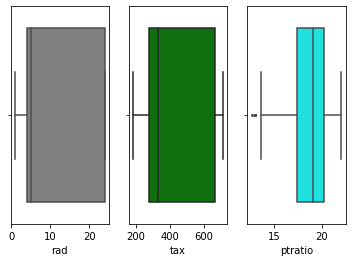

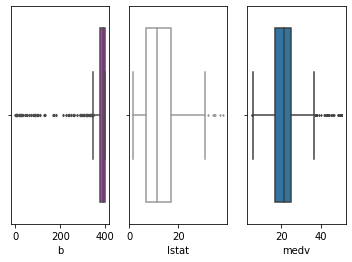

In [ ]:
#Construção de boxplot a cada 3(ou 4) variáveis para melhor utilização de espaço e para melhor visualização.
fig, ax =plt.subplots(1,3)
sns.boxplot(data_boston['crim'], ax=ax[0], fliersize = 1.75, color ='yellow')
sns.boxplot(data_boston['zn'], ax=ax[1], fliersize = 1.5, color = 'grey')
sns.boxplot(data_boston['indus'], ax=ax[2])
fig.show()

fig, ax =plt.subplots(1,4)
sns.boxplot(data_boston['nox'], ax=ax[0], fliersize = 1.5, color = 'magenta')
sns.boxplot(data_boston['rm'], ax=ax[1], fliersize = 2.0, color = 'blue')
sns.boxplot(data_boston['age'], ax=ax[2], color=  'red')
sns.boxplot(data_boston['dis'], ax=ax[3], fliersize = 1.75, color ='yellow')
fig.show()

fig, ax =plt.subplots(1,3)
sns.boxplot(data_boston['rad'], ax=ax[0], fliersize = 1.5, color = 'grey')
sns.boxplot(data_boston['tax'], ax=ax[1], color = 'green')
sns.boxplot(data_boston['ptratio'], ax=ax[2], fliersize = 1.75, color ='cyan')
fig.show()

fig, ax =plt.subplots(1,3)
sns.boxplot(data_boston['b'], ax=ax[0], fliersize = 1.9, color = 'magenta')
sns.boxplot(data_boston['lstat'], ax=ax[1],fliersize = 1.5, color = 'white')
sns.boxplot(data_boston['medv'],fliersize = 1.5, ax=ax[2])
fig.show()


Agora, os boxplot das variáveis foram combinados em grupos menores para uma melhor visualização.

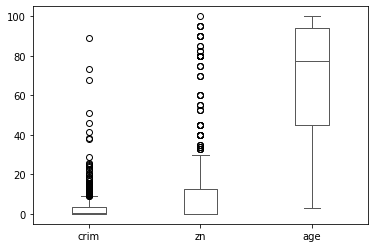

In [ ]:
boxplot = data_boston.boxplot(column=['crim', 'zn', 'age'], color = 0.35,  grid =False)

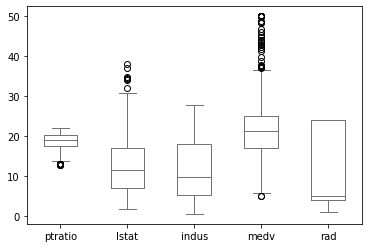

In [ ]:
boxplot = data_boston.boxplot(column=['ptratio', 'lstat','indus' ,'medv', 'rad'], color = 0.45, grid =False)

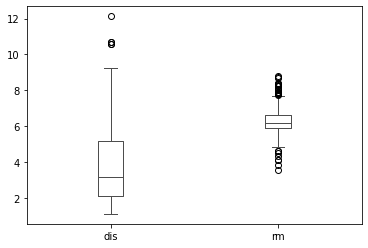

In [ ]:
boxplot = data_boston.boxplot(column=['dis', 'rm'], color =0.3,  grid =False)

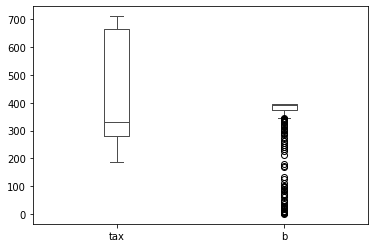

In [ ]:
boxplot = data_boston.boxplot(column=['tax', 'b'], color = 0.3, grid =False)

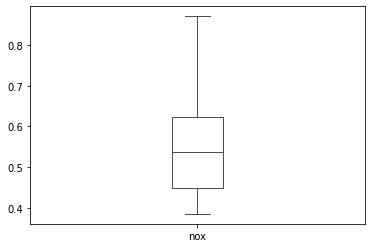

In [ ]:
boxplot = data_boston.boxplot(column=['nox'], color = 0.3 , grid =False)

#####Boxplots com dados normalizados e padronizados das variáveis 

In [ ]:
# considera somente os atributos que contem a classe
X = np.array(data_boston[data_boston.columns[0:data_boston.shape[1]]])
scaler = MinMaxScaler(feature_range=(0, 1)) # prepara a função para transformar os dados
X_norm = scaler.fit_transform(X) # Realiza a normalização e coloca em um novo vetor
X_norm = np.array(data_boston[data_boston.columns[0:data_boston.shape[1]]])
scaler = StandardScaler().fit(X_norm) # prepara a função para transformar os dados
data_norm = scaler.transform(X_norm) # realiza a padronização (média=0, variância = 1)
data_boston_norm_padr = pd.DataFrame(data_norm, columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat', 'medv'])

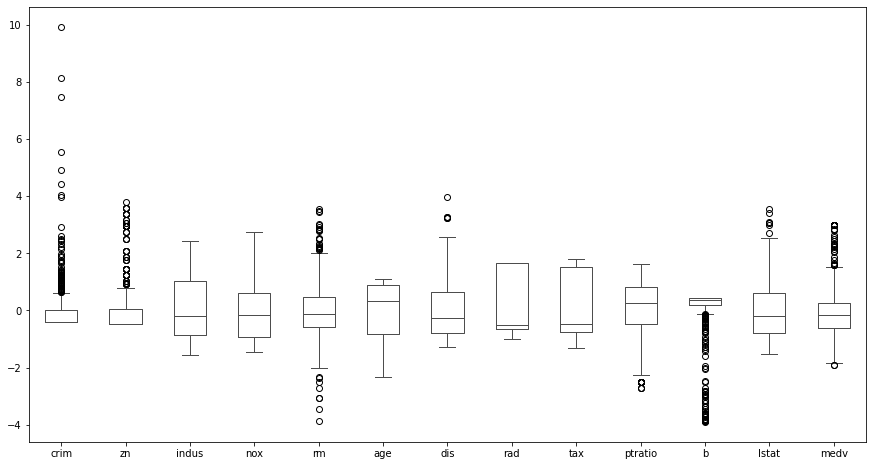

In [ ]:
boxplot = data_boston_norm_padr.boxplot(column=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat', 'medv'], color = 0.3, grid =False, figsize= (15,8))

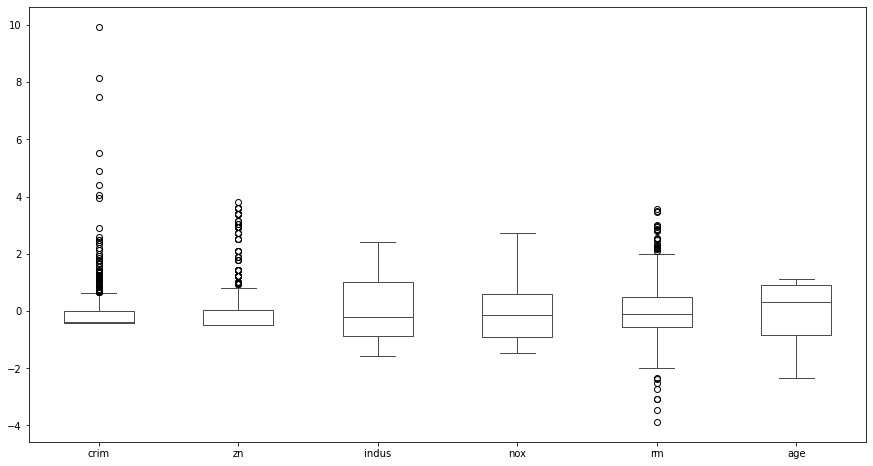

In [ ]:
boxplot = data_boston_norm_padr.boxplot(column=['crim', 'zn', 'indus', 'nox', 'rm', 'age'], grid=False, color = 0.30,figsize= (15,8) )

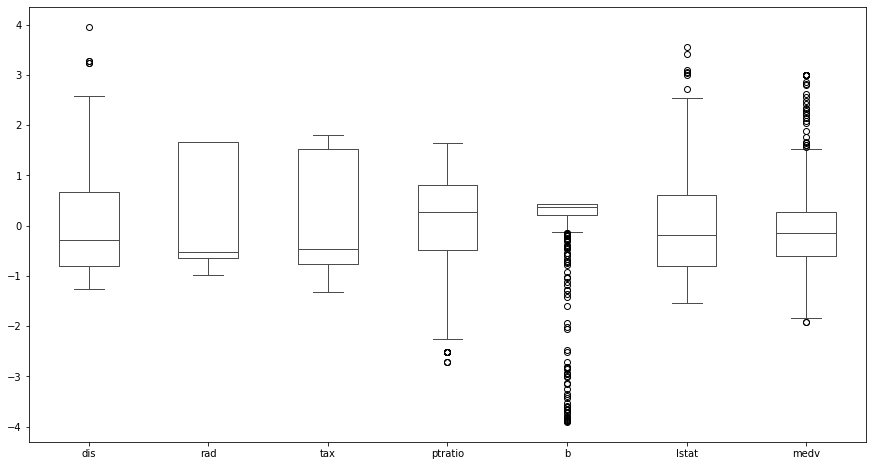

In [ ]:
boxplot = data_boston_norm_padr.boxplot(column=['dis','rad', 'tax','ptratio', 'b', 'lstat', 'medv'], grid =False, color = 0.3, figsize= (15,8))